In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from IPython.display import HTML
from point_cloud_utils import *

In [20]:
with open('0000000010.bin', 'rb') as f:
    d = np.fromfile(f, dtype=np.float32)
    print(d.shape)

(492892,)


In [21]:
d = d.reshape((int(d.shape[0]/4), 4))

In [22]:
train_datapath = '../data/velodyne/training/velodyne/'
vlp_streampath = '../data/2011_09_26/2011_09_26_drive_0005_sync/velodyne_points/data/'

In [23]:
HRES = 0.35         # horizontal resolution (assuming 20Hz setting)
VRES = 0.4          # vertical res
VFOV = (-24.9, 2.0) # Field of view (-ve, +ve) along vertical axis
Y_FUDGE = 5         # y fudge factor for velodyne HDL 64E

### Velodyne Lidar Point Cloud Bird's eye view

In [24]:
im = birds_eye_point_cloud(d, side_range=(-30, 30), fwd_range=(-30, 30), res=0.1, saveto=None)

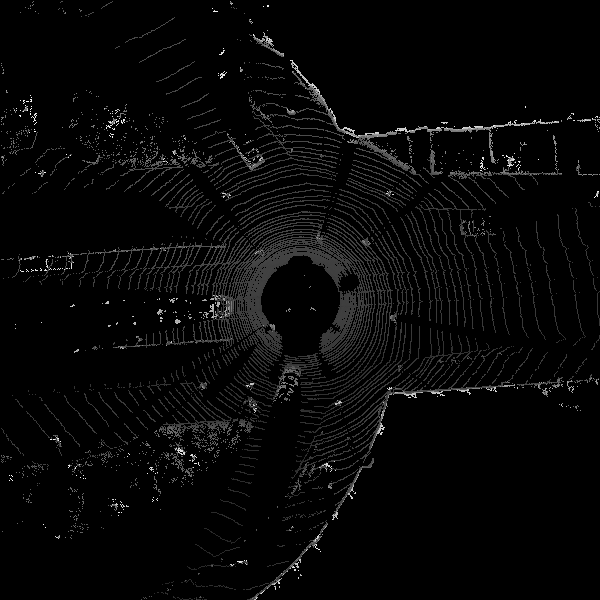

In [25]:
im

#### Velodyne lidar point cloud front view projection with **hieght** as metric

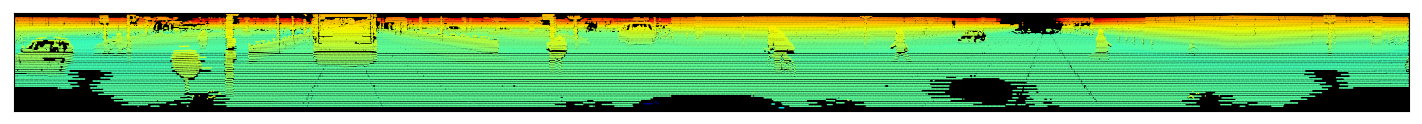

In [26]:
fig = lidar_to_2d_front_view(d, v_res=VRES, h_res=HRES, v_fov=VFOV, val="height", y_fudge=Y_FUDGE)



#### Velodyne lidar point cloud front view projection with **depth** as metric

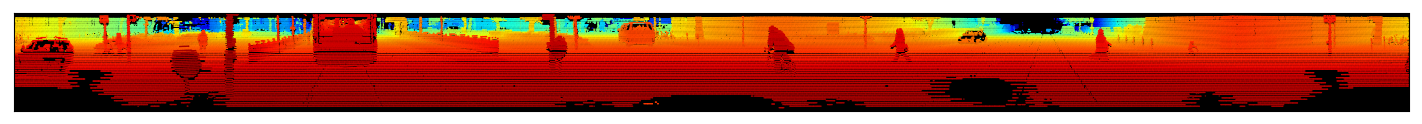

In [27]:
fig = lidar_to_2d_front_view(d, v_res=VRES, h_res=HRES, v_fov=VFOV, val="depth", y_fudge=Y_FUDGE)

In [13]:
for fn in os.listdir(vlp_streampath):
    with open(os.path.join(vlp_streampath, fn), 'rb') as f:
        d = np.fromfile(f, dtype=np.float32)
        d = d.reshape((int(d.size/4), 4))
        im = birds_eye_point_cloud(d, side_range=(-30, 30), fwd_range=(-30, 30), res=0.1, saveto='./point-cloud-images/{}'.format(fn.replace('bin','png')))

In [1]:
#!ffmpeg -loglevel panic -pattern_type glob -i './point-cloud-images/*.png'  -vcodec libx264 -s 1280x720 -pix_fmt yuv420p vlp-viz.mp4

In [15]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('vlp-viz.mp4'))